In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# Decision tree & metrics packages
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import _tree
import sklearn.metrics as metrics

#Random Forest Packages
from operator import itemgetter
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Gradient Boosting Packages
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [4]:
INFILE = '/Users/zachtsouprakos/documents/msds/msds-422/hmeq_module1.csv'

TARGET_F = 'TARGET_BAD_FLAG'
TARGET_A = 'TARGET_LOSS_AMT'

## Step 1: Source data set from last assignment
* Create copy of dataframe and remove any fields that contain nulls
* Create a data frame to hold all predictors (X)
* Create a dat frame to hold the two target variables (Y)

In [5]:
df = pd.read_csv(INFILE)

df.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
TARGET_BAD_FLAG,1,1,1,1,0
TARGET_LOSS_AMT,641,1109,767,1425,NaN
LOAN,1100,1300,1500,1500,1700
MORTDUE,25860,70053,13500,NaN,97800
VALUE,39025,68400,16700,NaN,112000
REASON,HomeImp,HomeImp,HomeImp,NaN,HomeImp
JOB,Other,Other,Other,NaN,Office
YOJ,10.5,7,4,NaN,3
DEROG,0,0,0,NaN,0


In [229]:
col = df.columns #isna().sum()
col_na = []
for i in df.columns: 
    if df[i].isna().sum() > 0: col_na.append(i)

col_na

['TARGET_LOSS_AMT',
 'MORTDUE',
 'VALUE',
 'REASON',
 'JOB',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

In [6]:
df.dtypes

Unnamed: 0            int64
TARGET_BAD_FLAG       int64
TARGET_LOSS_AMT     float64
LOAN                  int64
MORTDUE             float64
VALUE               float64
REASON               object
JOB                  object
YOJ                 float64
DEROG               float64
DELINQ              float64
CLAGE               float64
NINQ                float64
CLNO                float64
DEBTINC             float64
IMP_REASON           object
IMP_JOB              object
M_MORTDUE             int64
IMP_MORTDUE         float64
M_VALUE               int64
IMP_VALUE           float64
M_YOJ                 int64
IMP_YOJ             float64
M_DEROG               int64
IMP_DEROG           float64
M_DELINQ              int64
IMP_DELINQ          float64
M_CLAGE               int64
IMP_CLAGE           float64
M_NINQ                int64
IMP_NINQ            float64
M_CLNO                int64
IMP_CLNO            float64
M_DEBTINC             int64
IMP_DEBTINC         float64
z_REASON_DebtCon    

In [230]:
X = df.copy()
X = X.drop([TARGET_A, TARGET_F, 'MORTDUE','VALUE' ,'REASON' ,'JOB', 'Unnamed: 0', 'YOJ', 'DEROG', 'DELINQ', 'DELINQ',
           'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'IMP_REASON', 'IMP_JOB'], axis = 1)

In [231]:
X.head().T

,0,1,2,3,4
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
M_MORTDUE,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_MORTDUE,25860.000000,70053.000000,13500.000000,65019.000000,97800.000000
M_VALUE,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_VALUE,39025.000000,68400.000000,16700.000000,89235.500000,112000.000000
M_YOJ,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_YOJ,10.500000,7.000000,4.000000,7.000000,3.000000
M_DEROG,0.000000,0.000000,0.000000,1.000000,0.000000
IMP_DEROG,0.000000,0.000000,0.000000,0.000000,0.000000
M_DELINQ,0.000000,0.000000,0.000000,1.000000,0.000000


In [232]:
Y = df[[TARGET_A, TARGET_F]]
Y.head().T

,0,1,2,3,4
TARGET_LOSS_AMT,641.0,1109.0,767.0,1425.0,NaN
TARGET_BAD_FLAG,1.0,1.0,1.0,1.0,0.0


## Step 2: Decision Trees
* Build a decision tree model to predict the probability of defaulting
* Build an additional decision tree model to predict the amount the will be lost

#### Steps:
* Decide best hyperparameters to leverage
* Test max_depth and min_sample_leaf to optimize model fitting and minimize overfitting/underfitting
* Calculate accuracy and AUC
* Create ROC Curve
* Visualize DC using graphviz 

In [233]:
# Create training data set (80%) and test data set (20%) for both the predictors and target variables
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, train_size = 0.8, test_size = 0.2, random_state = 1)

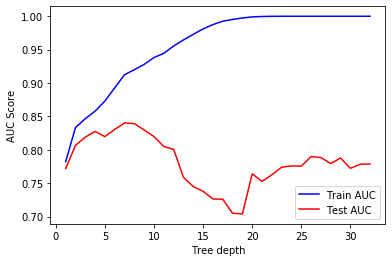

In [234]:
# Build a DT model to predict whether an individual defaults
# Lets first decide the best depth by looping through different scenarios and calculating the most optimal AUC Score

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []


for max_depth in max_depths:
    
    fm01_Tree = tree.DecisionTreeClassifier(max_depth=max_depth)
    fm01_Tree = fm01_Tree.fit(X_Train, Y_Train[TARGET_F])
    
    probs_train = fm01_Tree.predict_proba(X_Train)
    p_train = probs_train[:,1]
    probs_test = fm01_Tree.predict_proba(X_Test)
    p_test = probs_test[:,1]
    
    # returns false positive rate, true positive rate, and the threshold
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_Train[TARGET_F], p_train)
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_Test[TARGET_F], p_test)
    
    # Higher the value the more accurate your model is
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    roc_auc_test = metrics.auc(fpr_test, tpr_test)
    
    train_results.append(roc_auc_train)
    test_results.append(roc_auc_test)

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(loc = 'lower right')
plt.ylabel('AUC Score')
plt.xlabel('Tree depth')
plt.show()



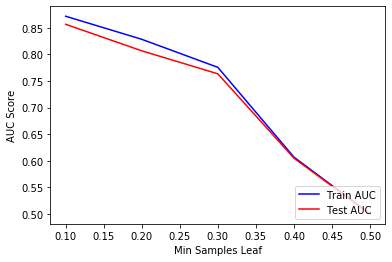

In [235]:
# lets also test one other hyper parameter, min_sample_leaf
# what we can see from below is that the higher we max this parameter, the lower the AUC score, resulting in underfitting

min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []


for min_samples_leaf in min_samples_leafs:
    
    fm01_Tree = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=min_samples_leaf)
    fm01_Tree = fm01_Tree.fit(X_Train, Y_Train[TARGET_F])
    
    probs_train = fm01_Tree.predict_proba(X_Train)
    p_train = probs_train[:,1]
    probs_test = fm01_Tree.predict_proba(X_Test)
    p_test = probs_test[:,1]
    
    # returns false positive rate, true positive rate, and the threshold
    fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_Train[TARGET_F], p_train)
    fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_Test[TARGET_F], p_test)
    
    # Higher the value the more accurate your model is
    roc_auc_train = metrics.auc(fpr_train, tpr_train)
    roc_auc_test = metrics.auc(fpr_test, tpr_test)
    
    train_results.append(roc_auc_train)
    test_results.append(roc_auc_test)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(loc = 'lower right')
plt.ylabel('AUC Score')
plt.xlabel('Min Samples Leaf')
plt.show()

In [236]:
# Build tree with best AUC score from above analysis

fm01_Tree = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.1)
fm01_Tree = fm01_Tree.fit(X_Train, Y_Train[TARGET_F])

Y_Pred_train = fm01_Tree.predict(X_Train)
Y_Pred_test = fm01_Tree.predict(X_Test)

print("Accuracy Train: ", metrics.accuracy_score(Y_Train[TARGET_F], Y_Pred_train))
print("Accuracy Test: ", metrics.accuracy_score(Y_Test[TARGET_F], Y_Pred_test))

Accuracy Train:  0.8519295302013423
Accuracy Test:  0.8506711409395973


In [237]:
# Calculate AUC and create ROC Curve

# Get the probablities of defaulting and not defaulting
# Keep only the probablity of defaulting for both training and test data sets
probs_train = fm01_Tree.predict_proba(X_Train)
p_train = probs_train[:,1]
probs_test = fm01_Tree.predict_proba(X_Test)
p_test = probs_test[:,1]

# returns false positive rate, true positive rate, and the threshold
fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_Train[TARGET_F], p_train)
fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_Test[TARGET_F], p_test)

In [238]:
# Calculate the area under the ROC curve
# Higher the value the more accurate your model is
roc_auc_train = metrics.auc(fpr_train, tpr_train)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test

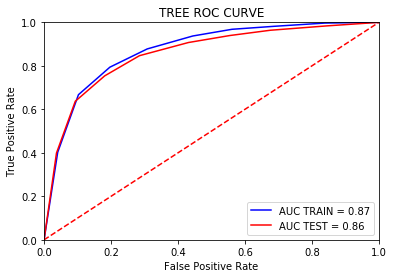

AUC Train 0.87
AUC Test 0.86


In [239]:
# Create ROC to test whether the model is good or not
plt.title('TREE ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label='AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label='AUC TEST = %0.2f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("AUC Train", round(roc_auc_train, 2))
print("AUC Test", round(roc_auc_test, 2))

In [240]:
feature_cols = list(X.columns.values)
tree.export_graphviz(fm01_Tree, out_file='tree_f.txt', filled=True, rounded=True, feature_names= feature_cols, impurity=False, class_names=['Good','Bad'])

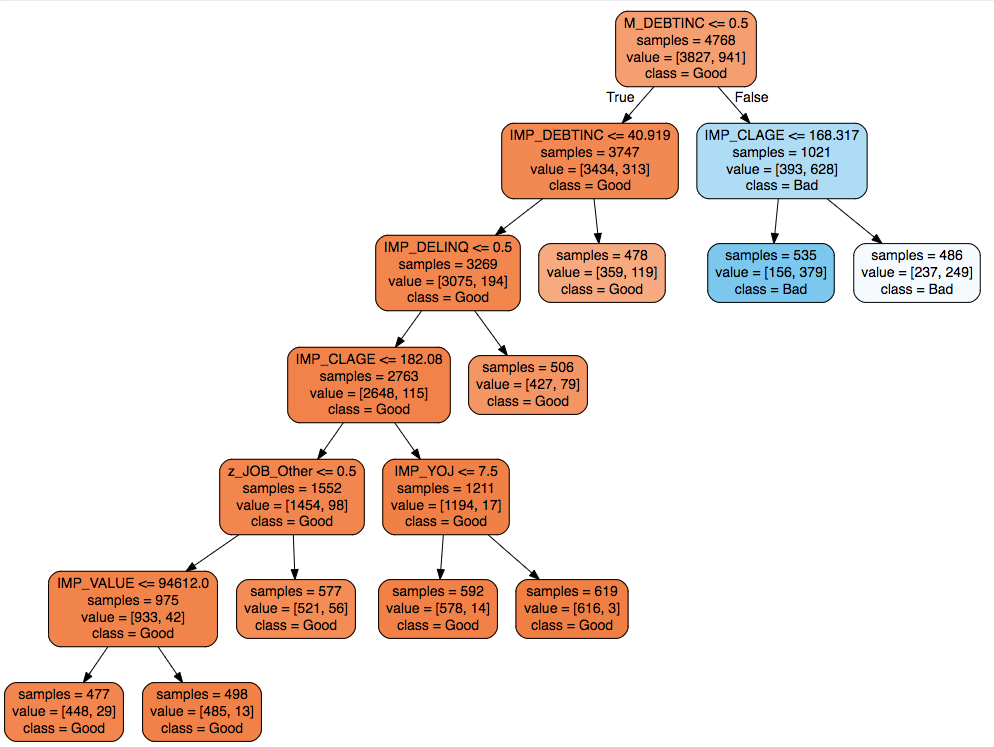

In [241]:
# Build function to get variables that are deemed important by the decision tree
def getTreeVars(TREE, varNames):
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else 'undefined' for i in tree_.feature]
    
    nameSet = set()
    for i in tree_.feature:
        if i in tree_.feature:
            nameSet.add(i)
    nameList = list(nameSet)
    parameter_list = list()
    for i in nameList:
        parameter_list.append(varNames[i])
    return parameter_list

# Call function with the tree model we built and the feature columns
vars_tree_flag = getTreeVars(fm01_Tree, feature_cols)

# Print out features
print("Features Utilized in Decision Tree:\n")
for i in vars_tree_flag:
    print(i)

Features Utilized in Decision Tree:

IMP_VALUE
IMP_YOJ
IMP_DELINQ
IMP_CLAGE
M_DEBTINC
IMP_DEBTINC
z_JOB_Other
z_JOB_Sales


### Building Model for predicting loan default amounts

In [242]:
# lets first identify the users who have a default amount which we can use to drive predictions
F = ~ Y_Train[TARGET_A].isna() # Users who have a loan amount will identify as 'True'
w_train = X_Train[F] #select only the true people and put it into w_train
z_train = Y_Train[F]
F1 = ~ Y_Test[TARGET_A].isna()
w_test = X_Test[F1] #select only the true people and put it into w_train
z_test = Y_Test[F1]

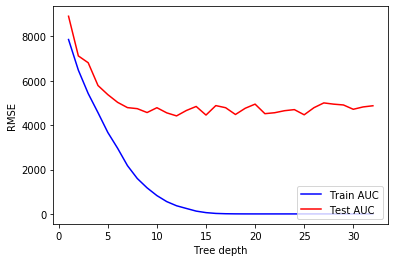

In [243]:
# Lets loop through different max_depths to minimize error
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []


for max_depth in max_depths:
    
    #build model and fit w_train data to the results in z_train
    amt_m01_tree = tree.DecisionTreeRegressor(max_depth=max_depth)
    amt_m01_tree = amt_m01_tree.fit(w_train, z_train[TARGET_A])
    
    # Predict the loss amount assuming the person does default their loan
    z_pred_train = amt_m01_tree.predict(w_train)
    z_pred_test = amt_m01_tree.predict(w_test)
    
    # Calculate means squarred error since we know the real value and the predicted value
    # Take the square root to get the root squared means error
    RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(z_train[TARGET_A], z_pred_train))
    RMSE_TEST = math.sqrt(metrics.mean_squared_error(z_test[TARGET_A], z_pred_test))
    
    train_results.append(RMSE_TRAIN)
    test_results.append(RMSE_TEST)

line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.legend(loc = 'lower right')
plt.ylabel('RMSE')
plt.xlabel('Tree depth')
plt.show()


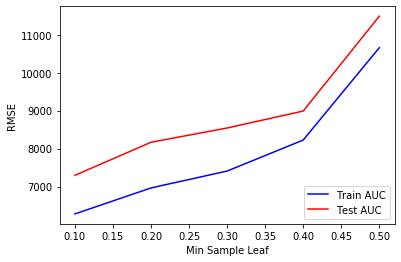

In [244]:
# Lets loop through different min_sample_leafs to minimize error
# Again, the higher this value the more error
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []


for min_samples_leaf in min_samples_leafs:
    
    #build model and fit w_train data to the results in z_train
    amt_m01_tree = tree.DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
    amt_m01_tree = amt_m01_tree.fit(w_train, z_train[TARGET_A])
    
    # Predict the loss amount assuming the person does default their loan
    z_pred_train = amt_m01_tree.predict(w_train)
    z_pred_test = amt_m01_tree.predict(w_test)
    
    # Calculate means squarred error since we know the real value and the predicted value
    # Take the square root to get the root squared means error
    RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(z_train[TARGET_A], z_pred_train))
    RMSE_TEST = math.sqrt(metrics.mean_squared_error(z_test[TARGET_A], z_pred_test))
    
    train_results.append(RMSE_TRAIN)
    test_results.append(RMSE_TEST)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plt.legend(loc = 'lower right')
plt.ylabel('RMSE')
plt.xlabel('Min Sample Leaf')
plt.show()


In [245]:
# Now lets build the model using the hyperparameters

#build model and fit w_train data to the results in z_train
amt_m01_tree = tree.DecisionTreeRegressor(max_depth = 5, min_samples_leaf=0.1)
amt_m01_tree = amt_m01_tree.fit(w_train, z_train[TARGET_A])

# Predict the loss amount assuming the person does default their loan
z_pred_train = amt_m01_tree.predict(w_train)
z_pred_test = amt_m01_tree.predict(w_test)

# Calculate means squarred error since we know the real value and the predicted value
# Take the square root to get the root squared means error
RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(z_train[TARGET_A], z_pred_train))
RMSE_TEST = math.sqrt(metrics.mean_squared_error(z_test[TARGET_A], z_pred_test))

RMSE_TREE = RMSE_TEST

print('TREE RMSE Train: ', RMSE_TRAIN)
print('TREE RMSE Test: ', RMSE_TEST)

TREE RMSE Train:  6281.454453730595
TREE RMSE Test:  7297.474614725242


In [246]:
feature_cols = list(X.columns.values)
vars_tree_amt = getTreeVars(amt_m01_tree, feature_cols)
tree.export_graphviz(amt_m01_tree, out_file='tree_a.txt', filled=True, rounded=True,feature_names=feature_cols, impurity=False, precision=0)

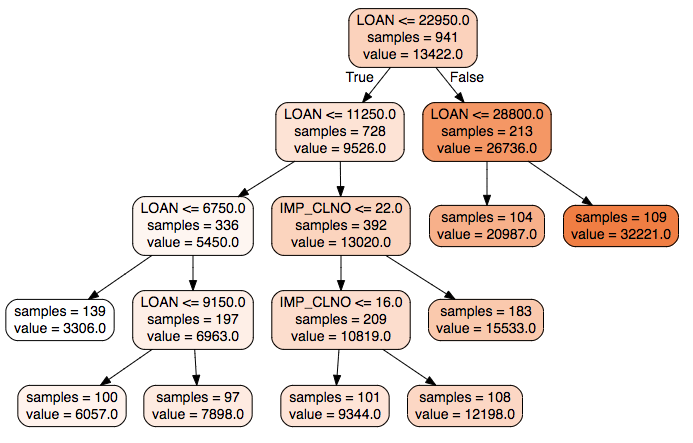

In [247]:
# Print out features
print("Features Utilized in Regression Decision Tree:\n")
for i in vars_tree_amt:
    print(i)

Features Utilized in Regression Decision Tree:

LOAN
IMP_CLNO
z_JOB_Sales


## Step 2: Random Forest Decision Trees
* Build a Random Forest decision tree model to predict the probability of defaulting
* Build an additional Random Forest decision tree model to predict the amount the will be lost

#### Steps:
* Decide best hyperparameters to leverage
* Test n_estimators to optimize model fitting and minimize overfitting/underfitting
* Calculate accuracy and AUC
* Create ROC Curve

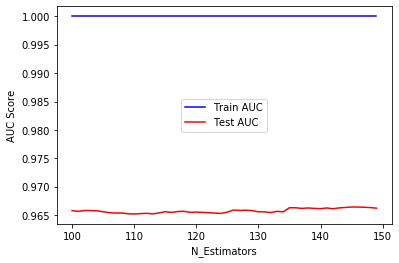

In [248]:
# Build a Random Forest DT model to predict whether an individual defaults
# Lets first decide the best depth by looping through different scenarios and calculating the most optimal AUC Score

n_esimators = range(100,150)
train_results = []
test_results = []


for n_esimator in n_esimators:
    
    fm01_RF = RandomForestClassifier(n_estimators=n_esimator, random_state = 1)
    fm01_RF = fm01_RF.fit(X_Train, Y_Train[TARGET_F])
    
    # Create ROC metrics for random forest
    # Predict probablity scores for those who default their loan
    # Grab false positive and true positive rates
    probs = fm01_RF.predict_proba(X_Train)
    p1 = probs[:,1]
    fpr_train, tpr_train, threshold = metrics.roc_curve( Y_Train[TARGET_F], p1)
    roc_auc_train = metrics.auc(fpr_train, tpr_train)

    probs = fm01_RF.predict_proba(X_Test)
    p1 = probs[:,1]
    fpr_test, tpr_test, threshold = metrics.roc_curve( Y_Test[TARGET_F], p1)
    roc_auc_test = metrics.auc(fpr_test, tpr_test)
    
    train_results.append(roc_auc_train)
    test_results.append(roc_auc_test)

line1, = plt.plot(n_esimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_esimators, test_results, 'r', label='Test AUC')
plt.legend(loc = 'center')
plt.ylabel('AUC Score')
plt.xlabel('N_Estimators')
plt.show()

In [249]:
print(max(test_results))

0.9664177829414982


In [250]:
# Get the most optimal number of trees to build
rf_auc = pd.DataFrame(test_results)
rf_auc['n_estimators'] = n_esimators
rf_auc.columns = ['auc', 'n_estimators']
rf_auc.head()

print('Highest AUC and optimal N_estimators:')
rf_auc[rf_auc['auc']==max(rf_auc['auc'])]

Highest AUC and optimal N_estimators:


,auc,n_estimators
45,0.966418,145


In [251]:
# Build the RF DT using the optimal n_esimators form above
fm01_RF = RandomForestClassifier(n_estimators=145, random_state = 1)
fm01_RF = fm01_RF.fit(X_Train, Y_Train[TARGET_F])

# Predict whether a person defaulted their loan on training and test data set
Y_Pred_train = fm01_RF.predict(X_Train)
Y_Pred_test = fm01_RF.predict(X_Test)

print("Random Forest\n")
print("Probablitity of Defaulting")
print("Accuracy of Training Data:", metrics.accuracy_score(Y_Train[TARGET_F], Y_Pred_train))
print("Accuracy of Test Data:", metrics.accuracy_score(Y_Test[TARGET_F], Y_Pred_test))
print("\n")

Random Forest

Probablitity of Defaulting
Accuracy of Training Data: 1.0
Accuracy of Test Data: 0.915268456375839




In [252]:
# Create ROC metrics for random forest
# Predict probablity scores for those who default their loan
# Grab false positive and true positive rates
probs = fm01_RF.predict_proba(X_Train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_Train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_RF.predict_proba(X_Test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_Test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test
auc_RF

0.9664177829414982

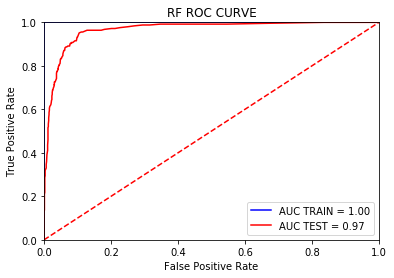

In [253]:
plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [254]:
# This will pull the feature importance from our tree and 
## only keep the variables where their important is above average
def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

# Print out features
feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( fm01_RF, feature_cols )

print("Features Utilized in Random Forest Decision Tree:\n")
for i in vars_RF_flag:
    print(i)

Features Utilized in Random Forest Decision Tree:

('M_DEBTINC', 100)
('IMP_DEBTINC', 78)
('IMP_CLAGE', 48)
('IMP_DELINQ', 44)
('LOAN', 39)
('IMP_VALUE', 38)
('IMP_MORTDUE', 36)
('IMP_CLNO', 35)
('IMP_YOJ', 29)
('IMP_DEROG', 24)


### Building Model for predicting loan default amounts

In [255]:
# Now lets build a RF DT to predict the amount in which will be lost from the default
amt_m01_RF = RandomForestRegressor(n_estimators=145, random_state = 1)
amt_m01_RF = amt_m01_RF.fit(w_train, z_train[TARGET_A])

# Predict whether a person defaulted their loan on training and test data set
Z_Pred_train = amt_m01_RF.predict(w_train)
Z_Pred_test = amt_m01_RF.predict(w_test)

# Calculate the RMSE for both the test and training data
RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt(metrics.mean_squared_error(z_test[TARGET_A], Z_Pred_test))

RMSE_RF = RMSE_TEST

print("RF RMSE TRAIN:", RMSE_TRAIN)
print("RF RMSE TEST:", RMSE_TEST)

RF RMSE TRAIN: 1229.725081605491
RF RMSE TEST: 3284.4344720501526


In [256]:
feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( amt_m01_RF, feature_cols )

for i in vars_RF_flag :
   print( i )

('LOAN', 100)
('IMP_CLNO', 12)
('IMP_DEBTINC', 5)


## Step 3: Gradient Boosting Decision Trees
* Build a Gradient Boosting decision tree model to predict the probability of defaulting
* Build an additional Gradient Boosting decision tree model to predict the amount the will be lost

#### Steps:
* Decide best hyperparameters to leverage
* Calculate accuracy and AUC
* Create ROC Curve

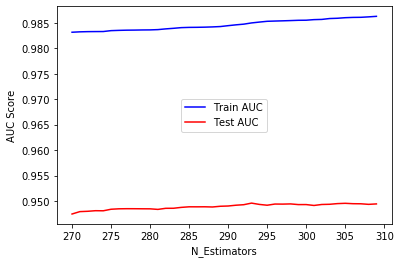

In [257]:
# Build a Random Forest DT model to predict whether an individual defaults
# Lets first decide the best depth by looping through different scenarios and calculating the most optimal AUC Score

n_esimators = range(270,310)
train_results = []
test_results = []


for n_esimator in n_esimators:
    
    fm01_GB = GradientBoostingClassifier(n_estimators=n_esimator, random_state = 1)
    fm01_GB = fm01_GB.fit(X_Train, Y_Train[TARGET_F])
    
    # Create ROC metrics for random forest
    # Predict probablity scores for those who default their loan
    # Grab false positive and true positive rates
    probs = fm01_GB.predict_proba(X_Train)
    p1 = probs[:,1]
    fpr_train, tpr_train, threshold = metrics.roc_curve( Y_Train[TARGET_F], p1)
    roc_auc_train = metrics.auc(fpr_train, tpr_train)

    probs = fm01_GB.predict_proba(X_Test)
    p1 = probs[:,1]
    fpr_test, tpr_test, threshold = metrics.roc_curve( Y_Test[TARGET_F], p1)
    roc_auc_test = metrics.auc(fpr_test, tpr_test)
    
    train_results.append(roc_auc_train)
    test_results.append(roc_auc_test)

line1, = plt.plot(n_esimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_esimators, test_results, 'r', label='Test AUC')
plt.legend(loc = 'center')
plt.ylabel('AUC Score')
plt.xlabel('N_Estimators')
plt.show()

In [258]:
# Build the RF DT using the optimal n_esimators form above
fm01_GB = GradientBoostingClassifier(n_estimators=305, random_state = 1)
fm01_GB = fm01_GB.fit(X_Train, Y_Train[TARGET_F])

# Predict whether a person defaulted their loan on training and test data set
Y_Pred_train = fm01_GB.predict(X_Train)
Y_Pred_test = fm01_GB.predict(X_Test)

print("Gradient Boosting\n")
print("Probablitity of Default")
print("Accuracy of Training Data:", metrics.accuracy_score(Y_Train[TARGET_F], Y_Pred_train))
print("Accuracy of Test Data:", metrics.accuracy_score(Y_Test[TARGET_F], Y_Pred_test))
print("\n")

Gradient Boosting

Probablitity of Default
Accuracy of Training Data: 0.9549077181208053
Accuracy of Test Data: 0.915268456375839




In [259]:
# Create ROC metrics for random forest
# Predict probablity scores for those who default their loan
# Grab false positive and true positive rates
probs = fm01_GB.predict_proba(X_Train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_Train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_GB.predict_proba(X_Test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_Test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test

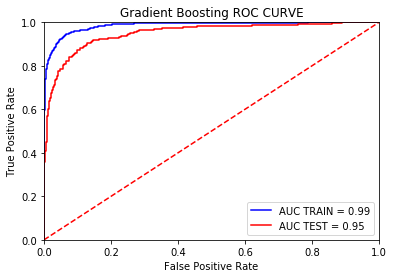

In [260]:
plt.title('Gradient Boosting ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [261]:
feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( fm01_GB, feature_cols )

for i in vars_RF_flag :
   print( i )

('M_DEBTINC', 100)
('IMP_DEBTINC', 31)
('IMP_DELINQ', 20)
('IMP_CLAGE', 18)
('IMP_VALUE', 11)


### Building Model for predicting loan default amounts

In [262]:
# Build Model
amt_m01_GB = RandomForestRegressor(n_estimators=305, random_state=1)
amt_m01_GB = amt_m01_GB.fit(w_train, z_train[TARGET_A])

# Predict the loss amounts from loan defaults
Z_Pred_train = amt_m01_GB.predict(w_train)
Z_Pred_test = amt_m01_GB.predict(w_test)

# Calculate RMSE for each value
RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt(metrics.mean_squared_error(z_test[TARGET_A], Z_Pred_test))

print("GB RMSE TRAIN:", RMSE_TRAIN)
print("GB RMSE TEST:", RMSE_TEST)

RMSE_GB = RMSE_TEST

GB RMSE TRAIN: 1267.0071931385253
GB RMSE TEST: 3282.143379536985


In [263]:
feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( amt_m01_GB, feature_cols )

for i in vars_RF_flag :
   print( i )

('LOAN', 100)
('IMP_CLNO', 12)
('IMP_DEBTINC', 5)


## Step 4: Compare all three models leveraging a final ROC Curve

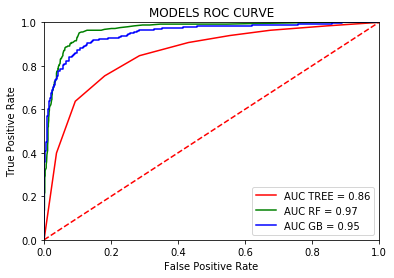

Root Mean Square Average For Loan Defaults
TREE 7297.474614725242
RF 3284.4344720501526
GB 3282.143379536985


In [264]:
# BUILD A FINAL ROC CURVE OF ALL THREE MODELS TO COMPARE THEM
plt.title('MODELS ROC CURVE')
plt.plot(fpr_tree, tpr_tree, 'b', label = 'AUC TREE = %0.2f' % auc_tree, color="red")
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC RF = %0.2f' % auc_RF, color="green")
plt.plot(fpr_GB, tpr_GB, 'b', label = 'AUC GB = %0.2f' % auc_GB, color="blue")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



print("Root Mean Square Average For Loan Defaults")
print("TREE", RMSE_TREE)
print("RF", RMSE_RF)
print("GB", RMSE_GB)